# Retry Replay Framework for Spring Boot

# Pre-requisite

- JDK 17
- Maven 3.9.x
- Gmail Id and Google App Password to get retry replay notifications

# Build Project Using 
- Command `mvn clean install`

# Execute Using

#### Option 1:
```
#Set the Environment Variables
spring.mail.password=Google App Password
spring.mail.username=Gmail ID
spring.security.user.admin.password=admin123
spring.security.user.admin.username=admin
spring.security.user.user.password=user123
spring.security.user.user.username=user
```
Run the spring boot application

#### Option 2:
- Command `mvn -Dspring.mail.username=<<yourEmailHere>> -Dspring.mail.password=<<YourPasswordHere>> -Dspring.security.user.admin.password=<<adminPasswordHere>> -Dspring.security.user.admin.username=<<adminUsernameHere>> -Dspring.security.user.user.password=<<userPasswordHere>> -Dspring.security.user.user.username=<<usernameHere>> spring-boot:run`

### Solution:
#### 1. API Call Simulation:

  - Create a service that randomly throws exceptions to simulate API failures.
  
#### 2. Retry Mechanisms:

- Use retry strategies to handle failures:
  - Fixed Interval: Retry after a fixed delay.
  - Exponential Backoff: Increase the delay exponentially after each failure.
  - Jitter: Add randomness to the delay to avoid thundering herd problems.
  - Circuit Breaker: Stop retrying after a certain number of failures and wait for a cooldown period.
  
#### 3. Quartz Scheduler:

 - Schedule a job to process failed API calls periodically.
 
#### 4. Replay UI:

 - Provide a web interface to view and manually retry failed API calls.

# Implementaion

To implement the configurable retry mechanism with multiple strategies, followed below steps:

- **Defined Retry Strategies:** Implemented Fixed Interval, Exponential Backoff, Circuit Breaker, and Jitter strategies. 
                                Depnding on retry count appropriate retry strategy will be selected
- **Integrate with Quartz:** Configure Quartz to use these strategies.
- **Replay Process with UI:** Design a UI for manual error correction and replay. This involves creating a Spring Boot web application with Thymeleaf templates..
- **Role-Based Access Control:** Used Spring Security to implement RBAC for the UI and retry mechanisms..
- **Logging and Monitoring:** Create a dashboard for monitoring and logging retry/replay activities.
- **Notification System:** Develop an automated notification system for retry/replay completions using Spring Boot's email support.
- **Testing:** Added unit tests for the retry strategies.

### To see the job triggering the service, you can follow these steps:

### Step 1: Run the Spring Boot Application

You can start the Spring Boot application using the following Maven command:

```sh
./mvn spring-boot:run
```

This will start the application and initialize the Quartz scheduler. The job will be triggered based on the configured interval.

### Step 2: Check the Logs

Monitor the application logs to see when the job is triggered and the service is called. You should see log entries indicating the job execution and any retries if the service call fails.

### Step 3: Monitoring the Job Execution

When the job is triggered, and if the service call succeeded or fails and the retry logic is executed, you should see log entries indicating the retries:

```
2025-03-29T10:51:29.700+05:30  INFO 13676 --- [quartz] [           main] org.quartz.core.QuartzScheduler          : Scheduler QuartzScheduler_$_NON_CLUSTERED started.
API call succeeded
API call succeeded
2025-03-29T10:52:31.381+05:30  INFO 13676 --- [quartz] [eduler_Worker-1] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
API call succeeded
2025-03-29T10:53:01.355+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
2025-03-29T10:53:01.358+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 2) using strategy: FixedIntervalRetryStrategy
2025-03-29T10:53:01.359+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 3) using strategy: FixedIntervalRetryStrategy
2025-03-29T10:53:02.956+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 4) using strategy: ExponentialBackoffRetryStrategy
API call succeeded
API call succeeded
2025-03-29T10:54:01.347+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
API call succeeded
API call succeeded
2025-03-29T10:55:01.368+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
API call succeeded
2025-03-29T10:55:31.354+05:30  INFO 13676 --- [quartz] [eduler_Worker-1] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
API call succeeded
API call succeeded
2025-03-29T10:56:31.355+05:30  INFO 13676 --- [quartz] [eduler_Worker-1] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
API call succeeded
2025-03-29T10:57:01.360+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 1) using strategy: FixedIntervalRetryStrategy
2025-03-29T10:57:01.367+05:30  INFO 13676 --- [quartz] [eduler_Worker-2] com.example.quartz.jobs.MySampleJob      : Retrying in 0ms (Attempt 2) using strategy: FixedIntervalRetryStrategy
API call succeeded
```
By following these steps, you can see when the job is triggering the service and verify the retry logic.

## Screenshots

### User Login:

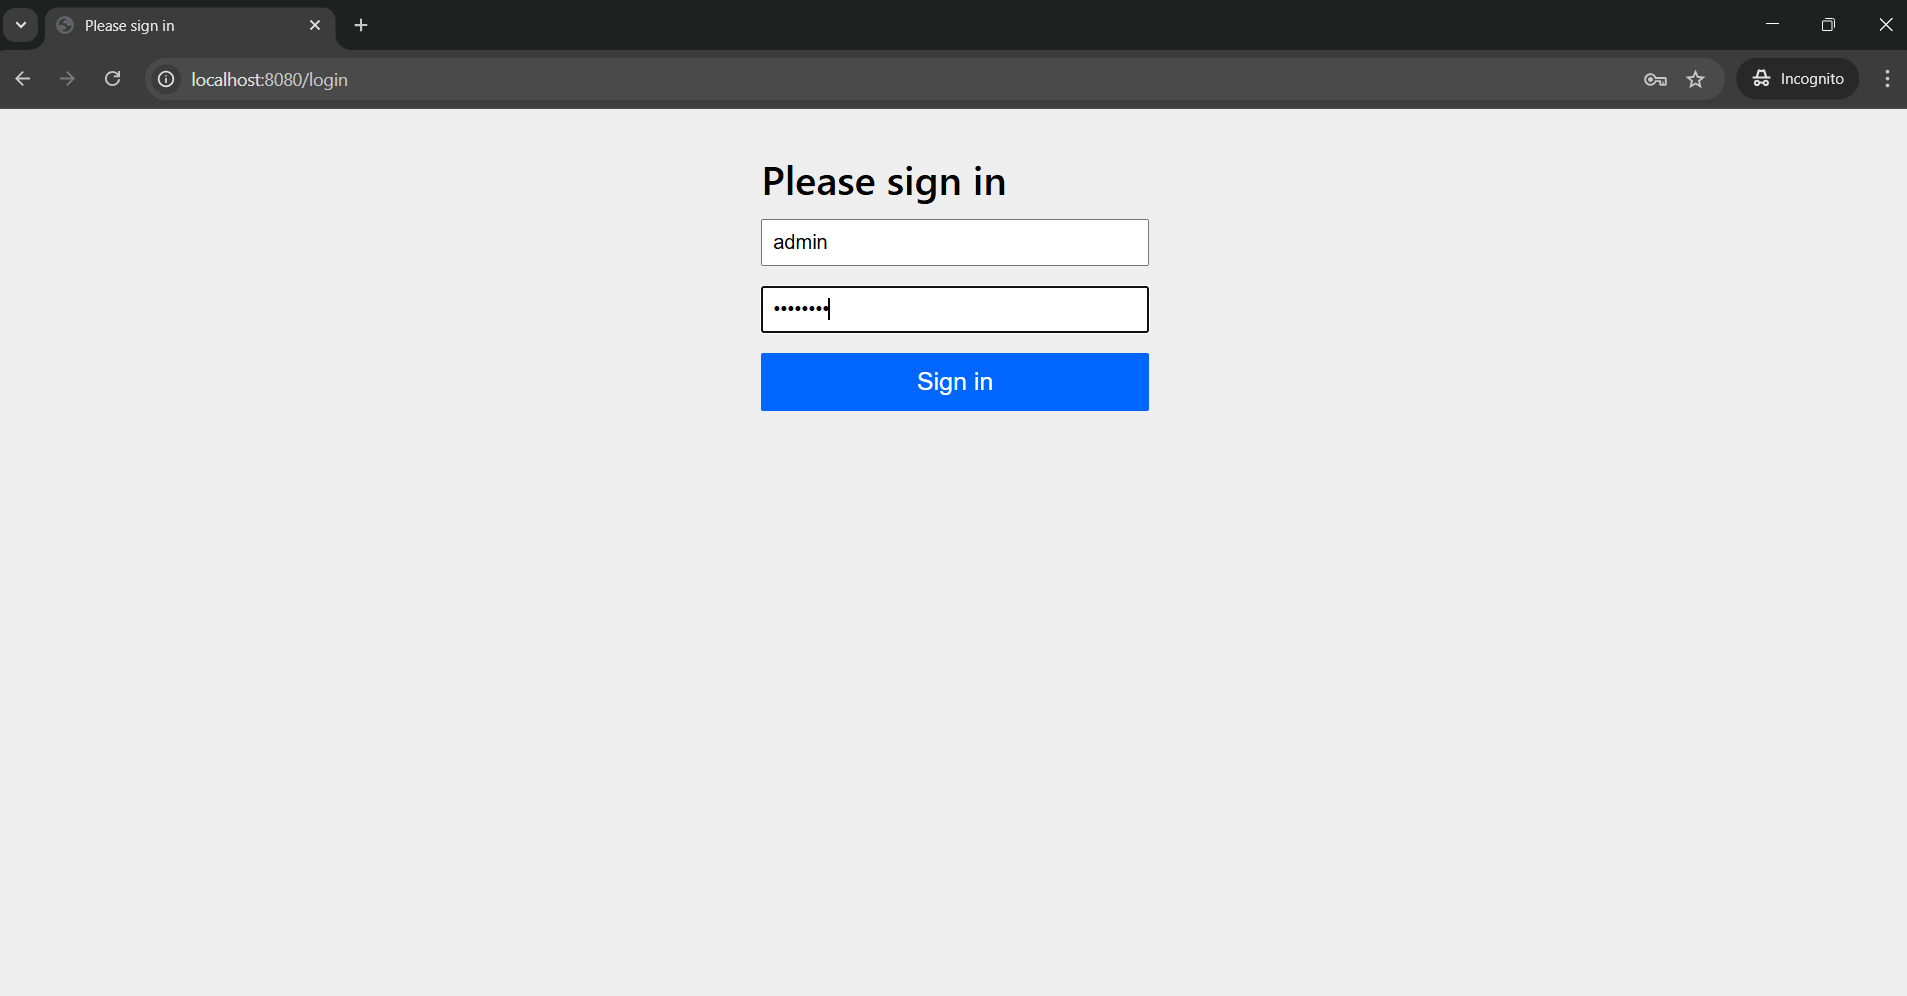

### Dashboard:

  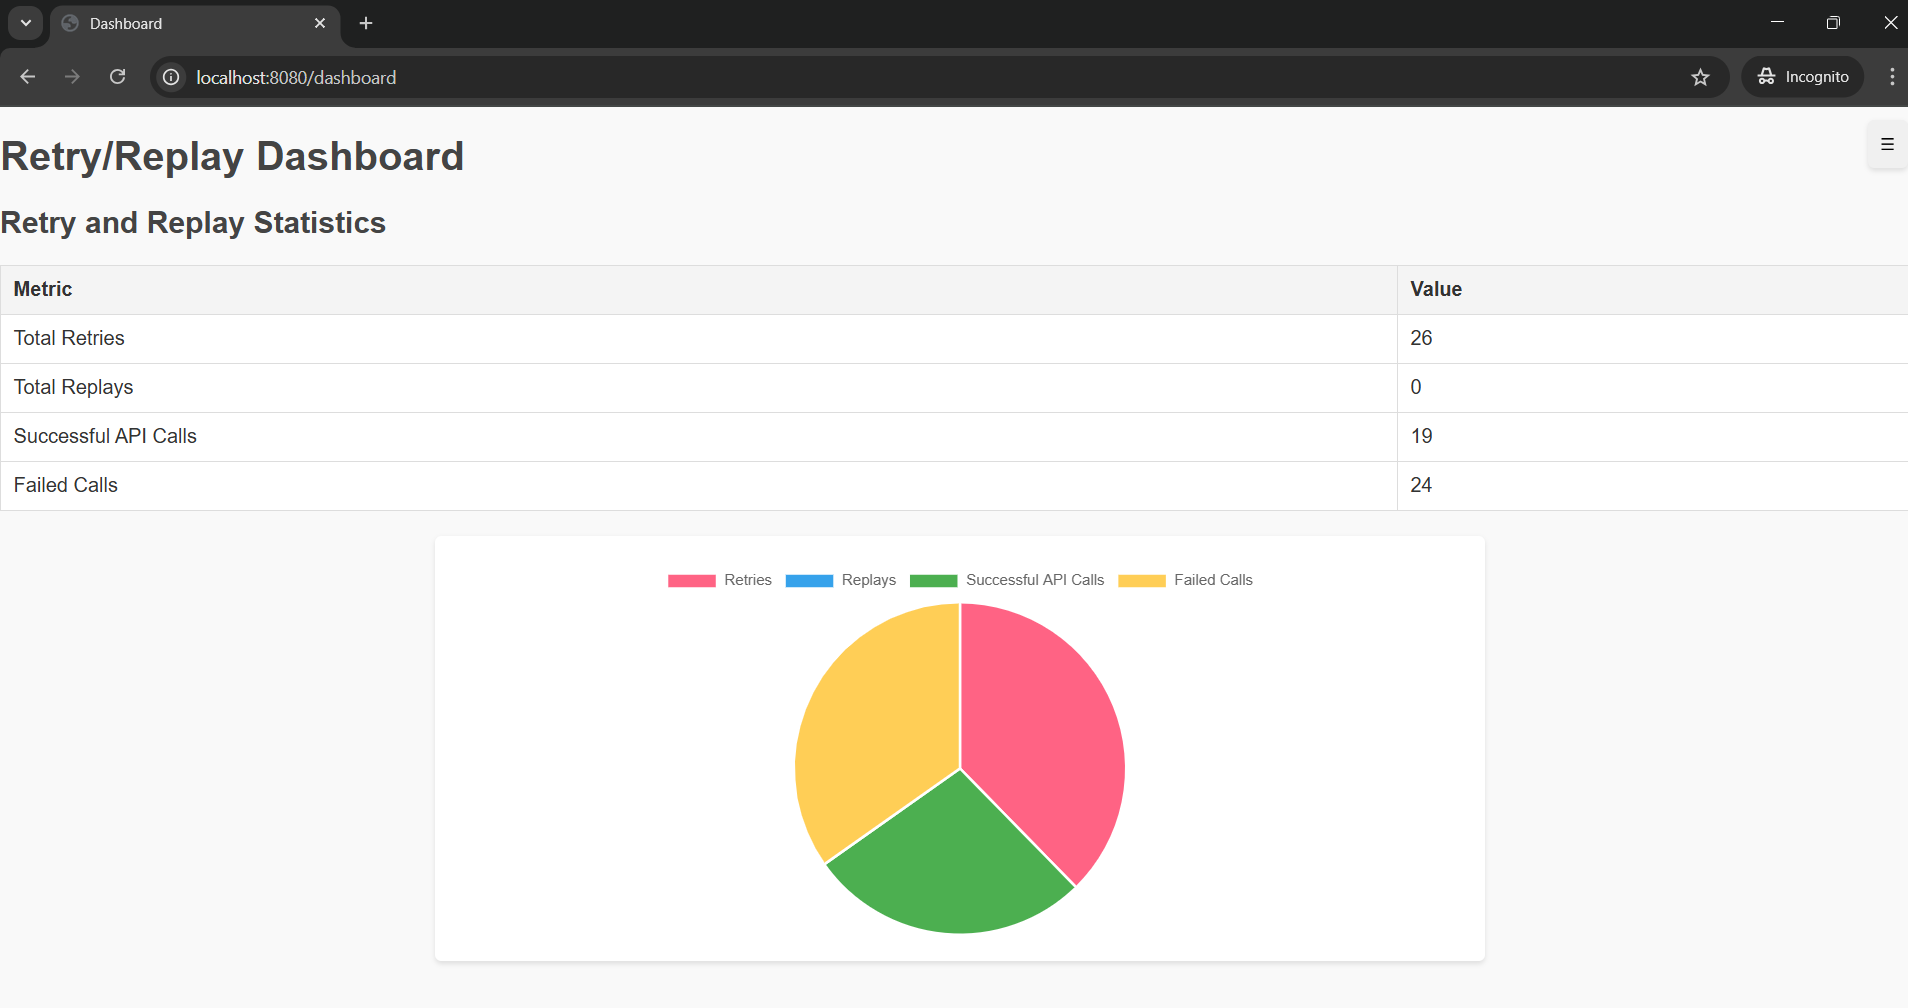

### Admin User Replay Success Page: 

  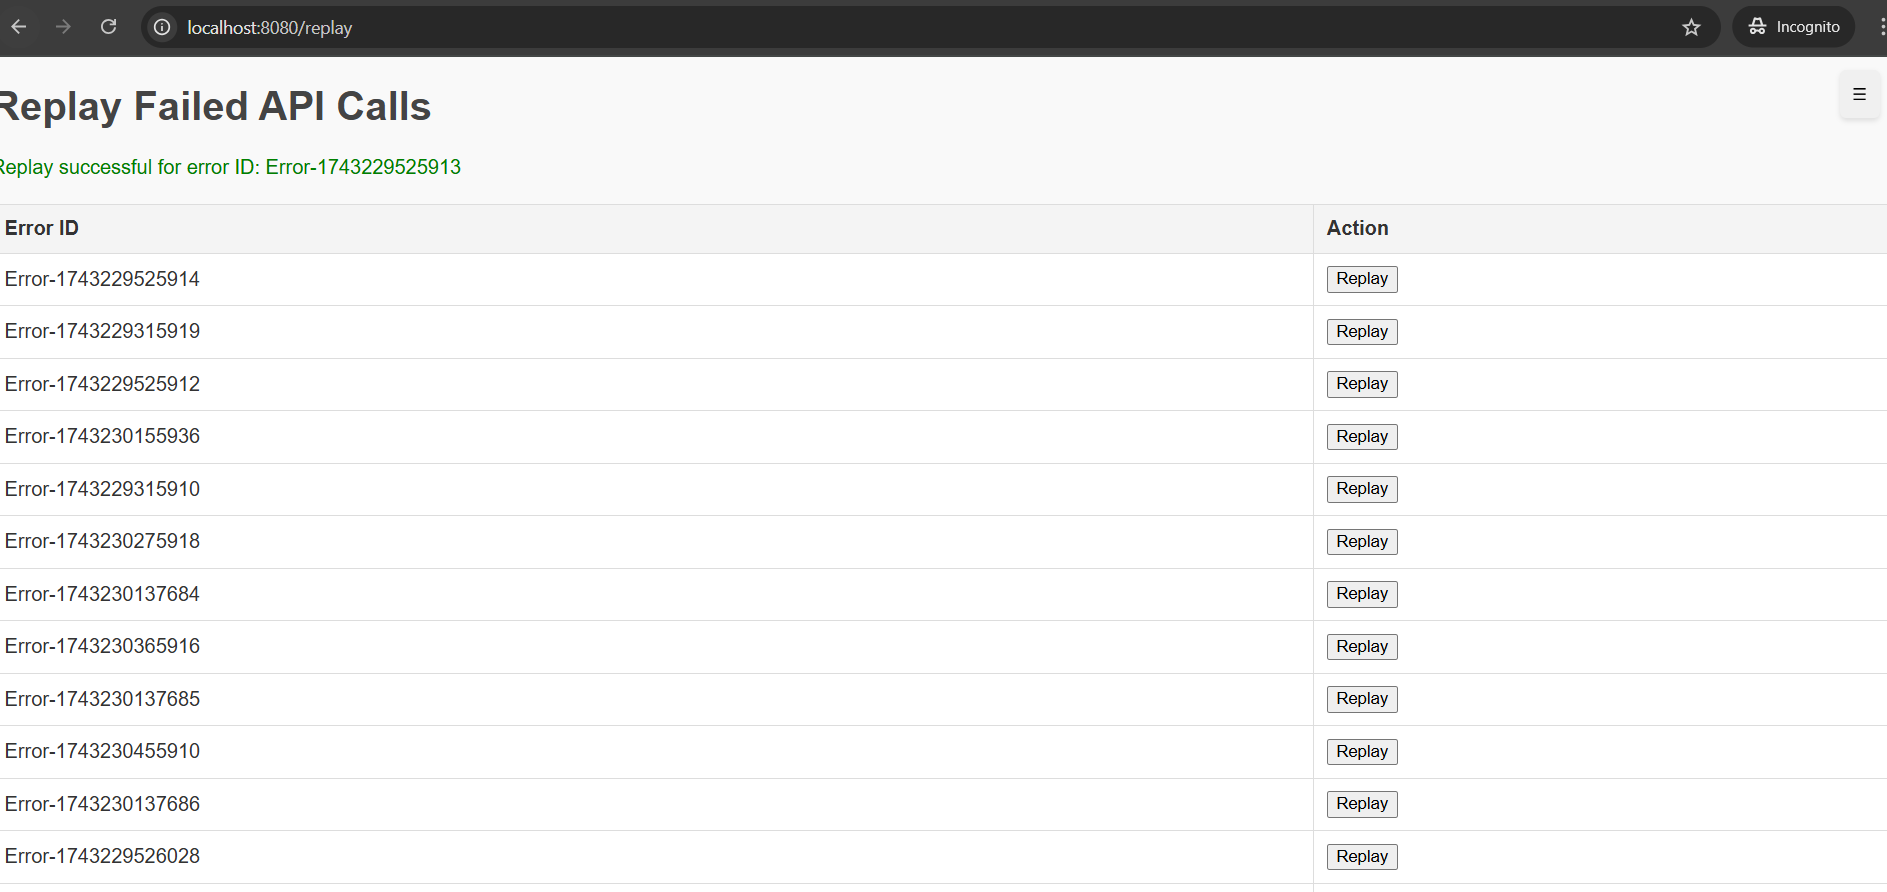

### Admin User Replay Failure Page:

  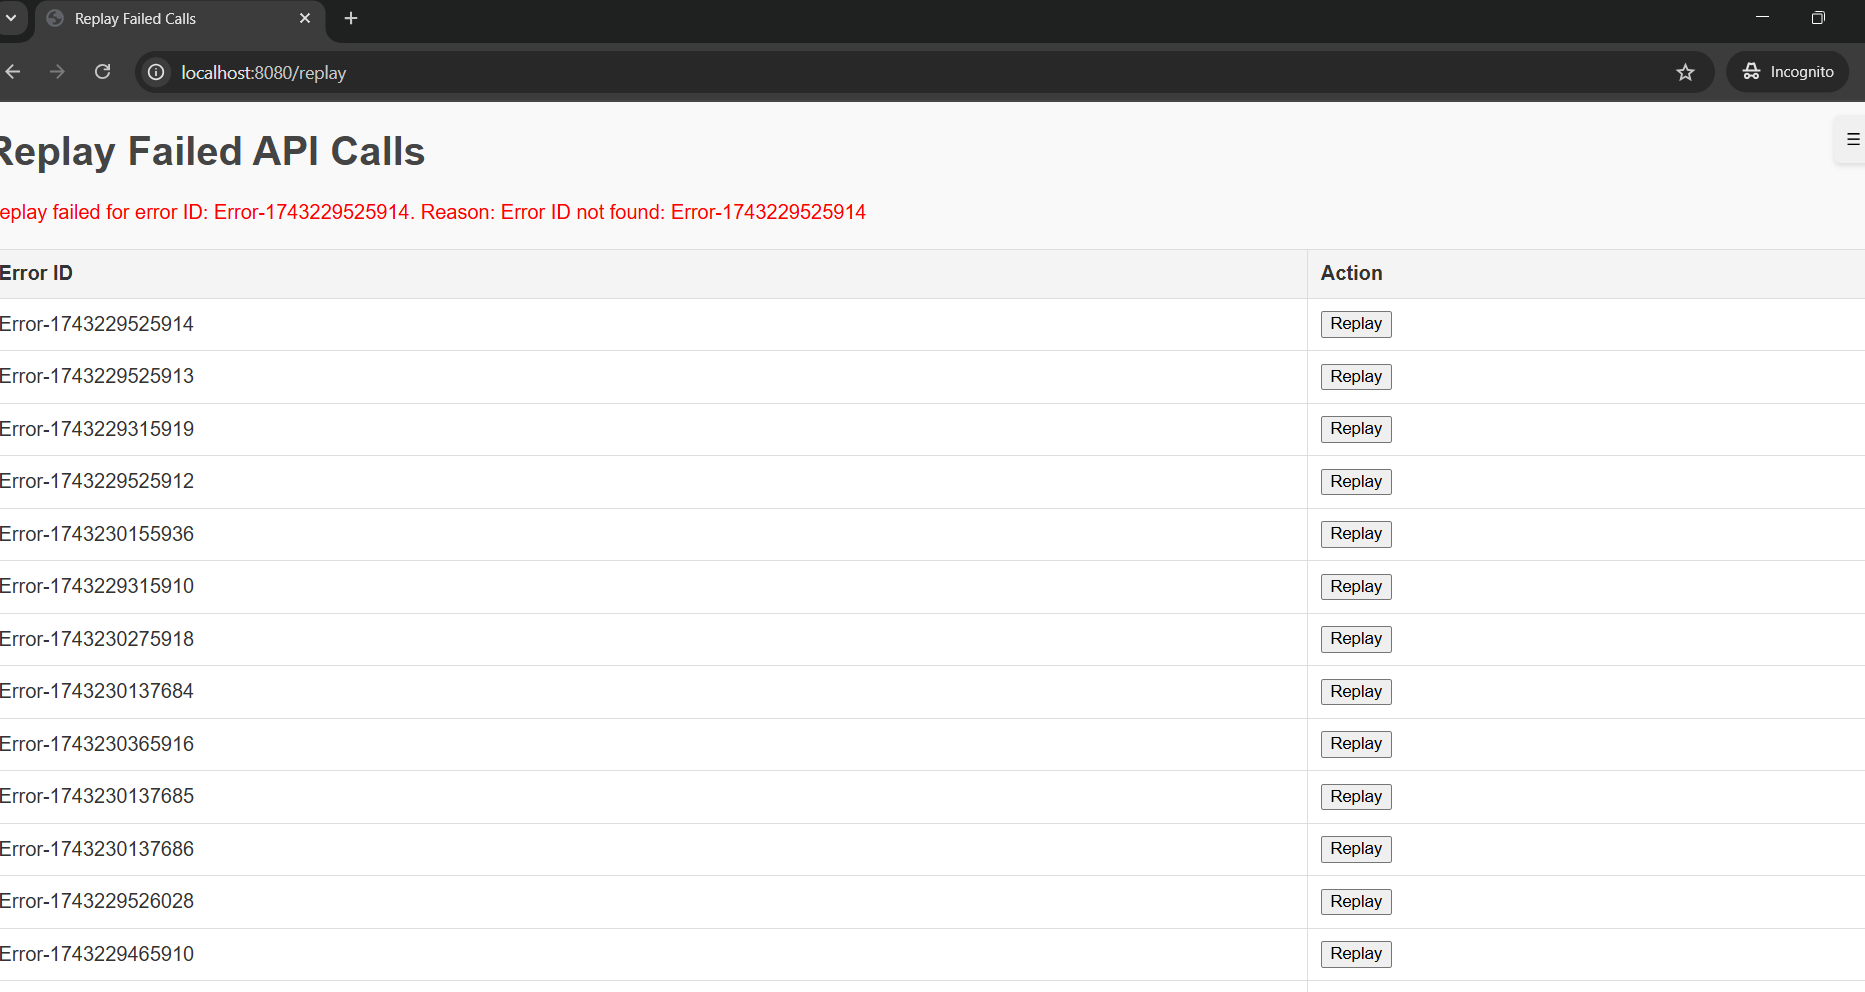

### User Type user Replay Page:

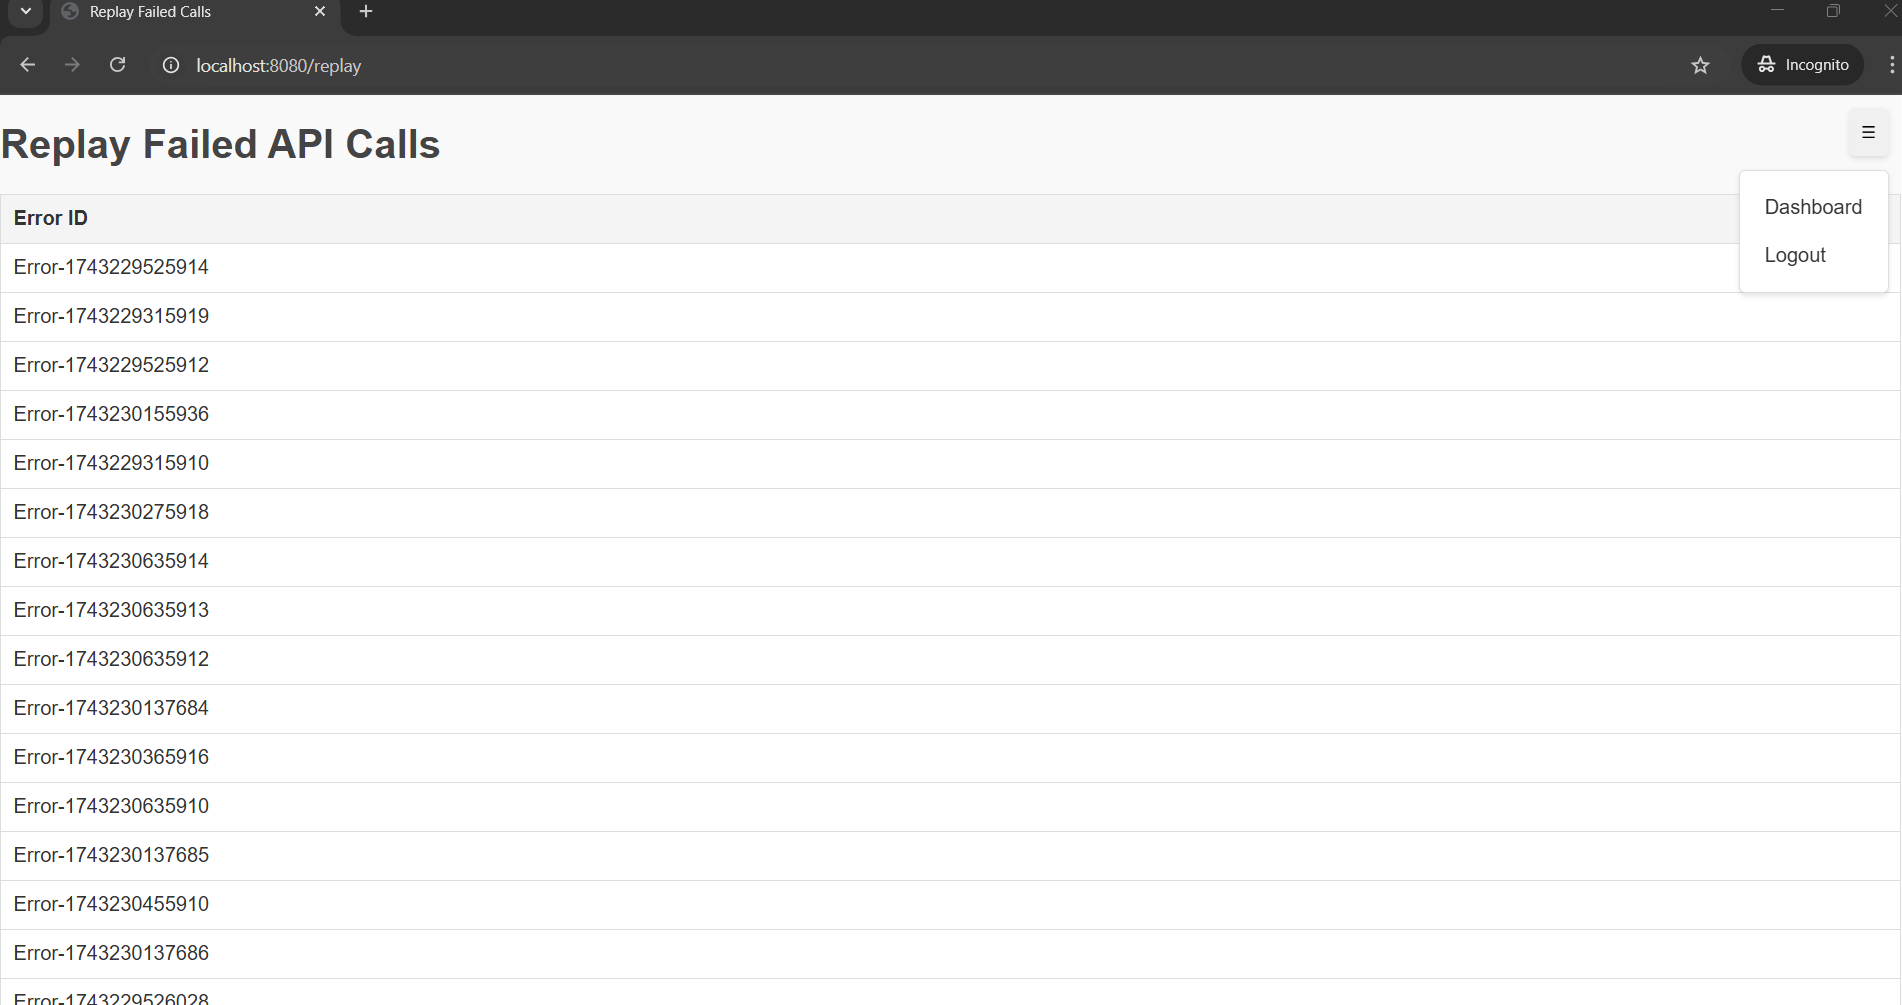

### Menu:

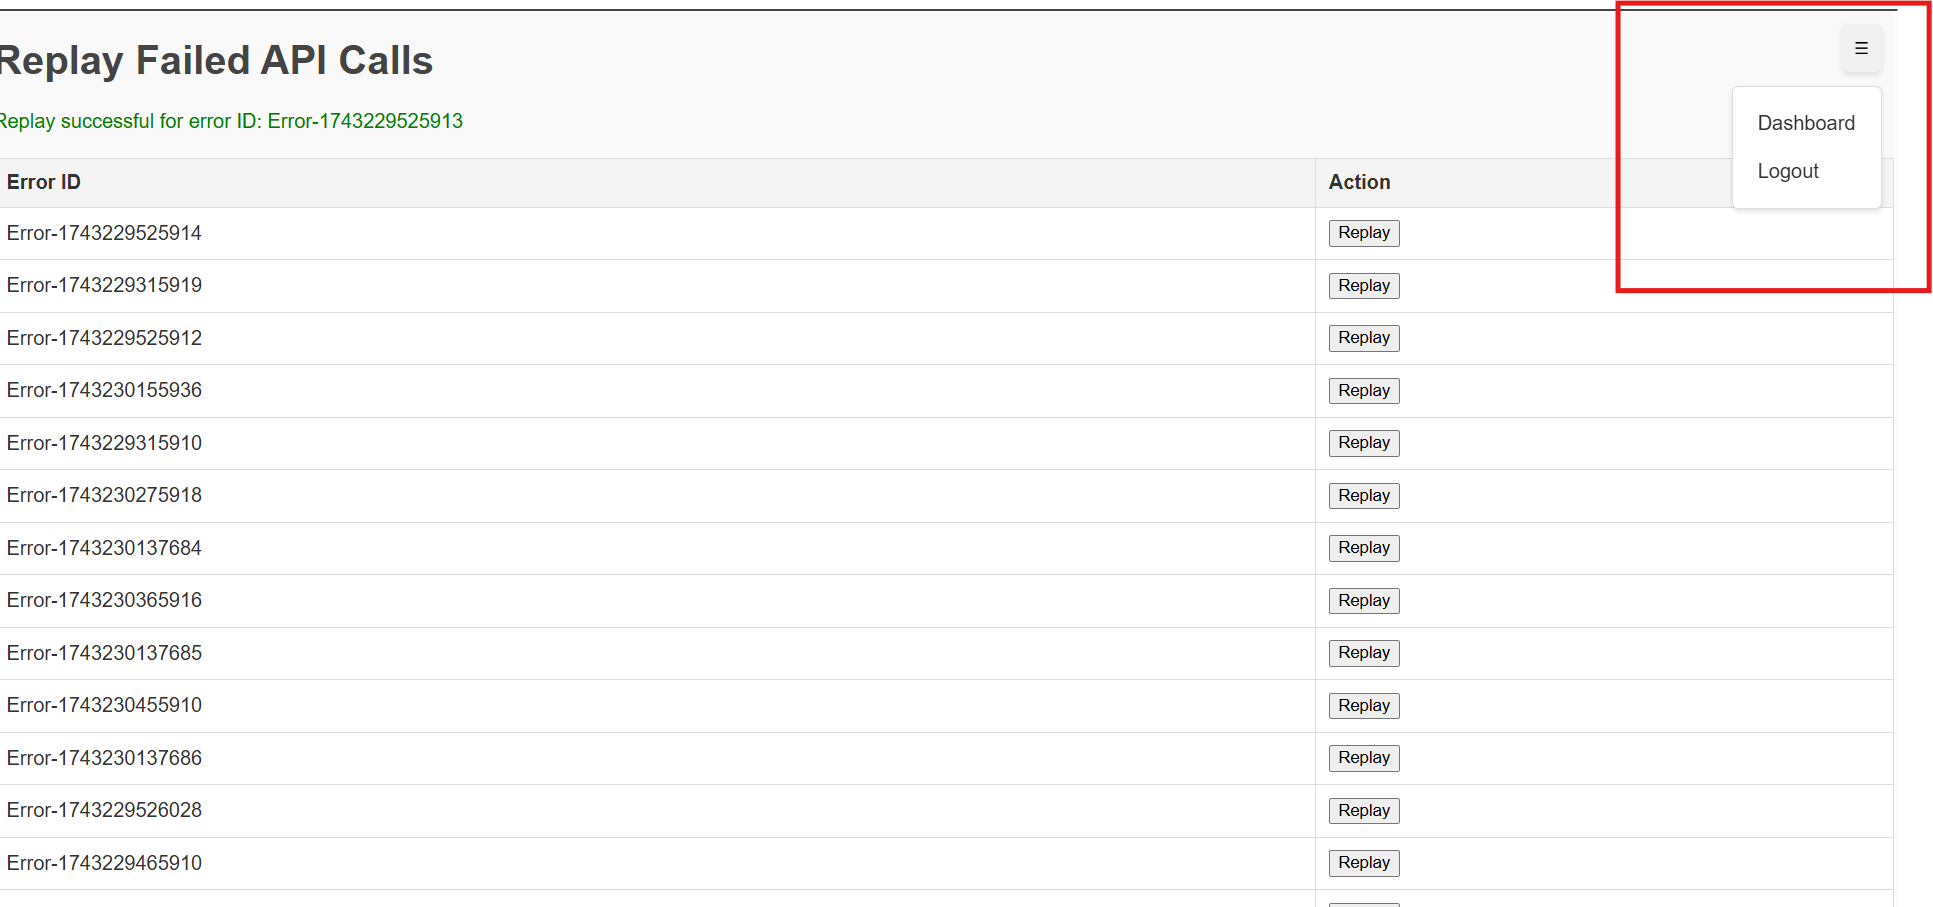

### Email Notification Replay Success:

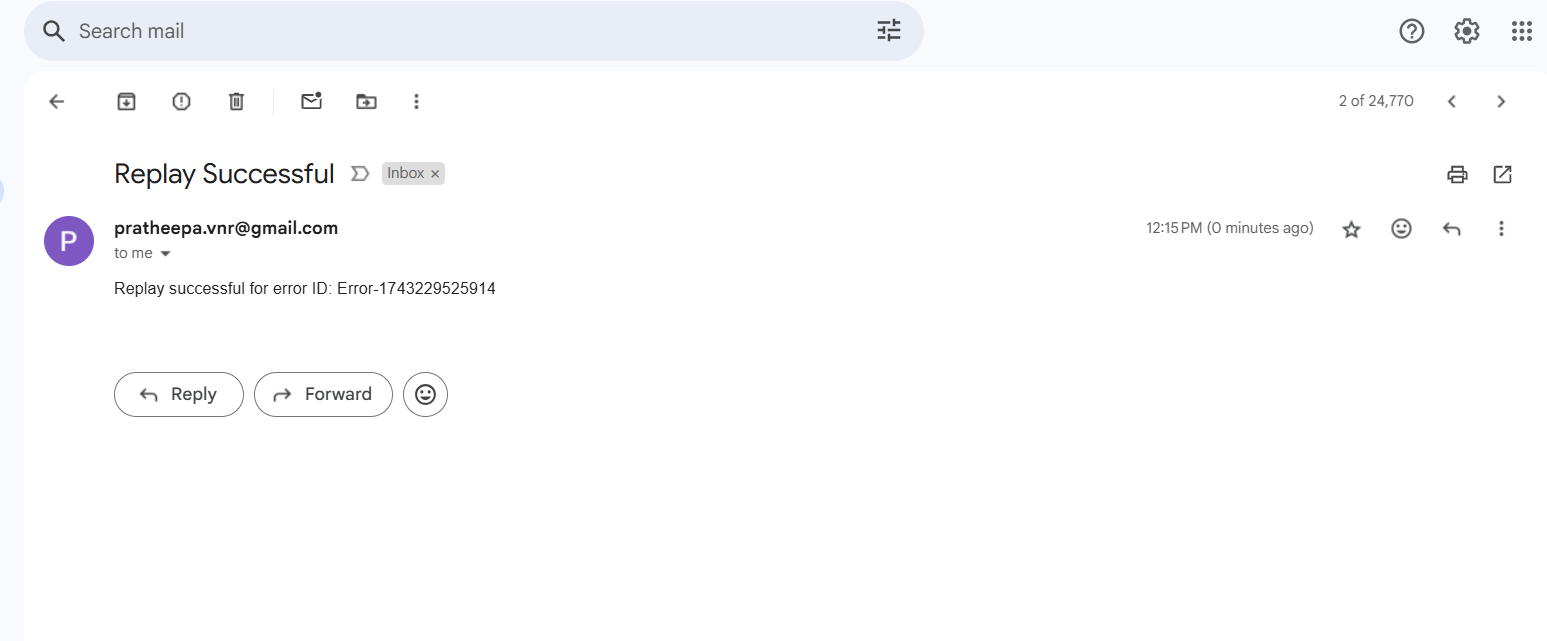

### Email Notification Replay Failure:

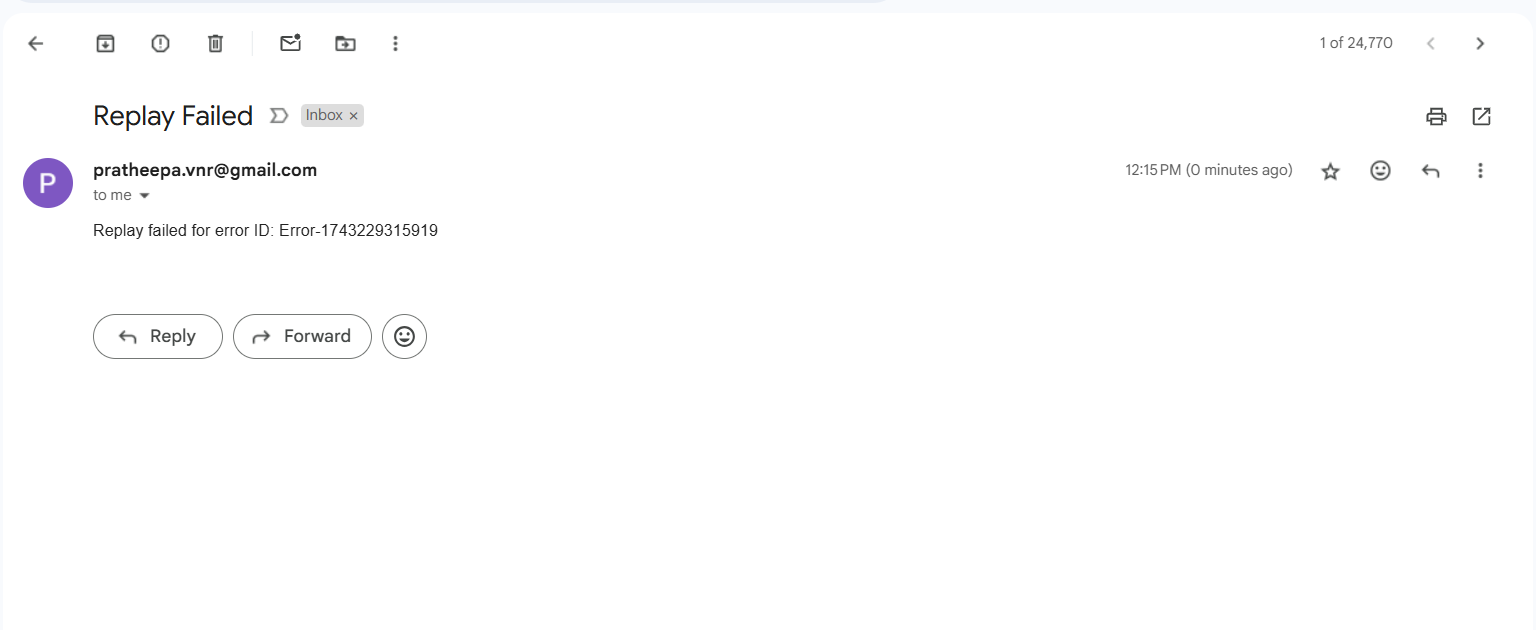

### Actuator Health

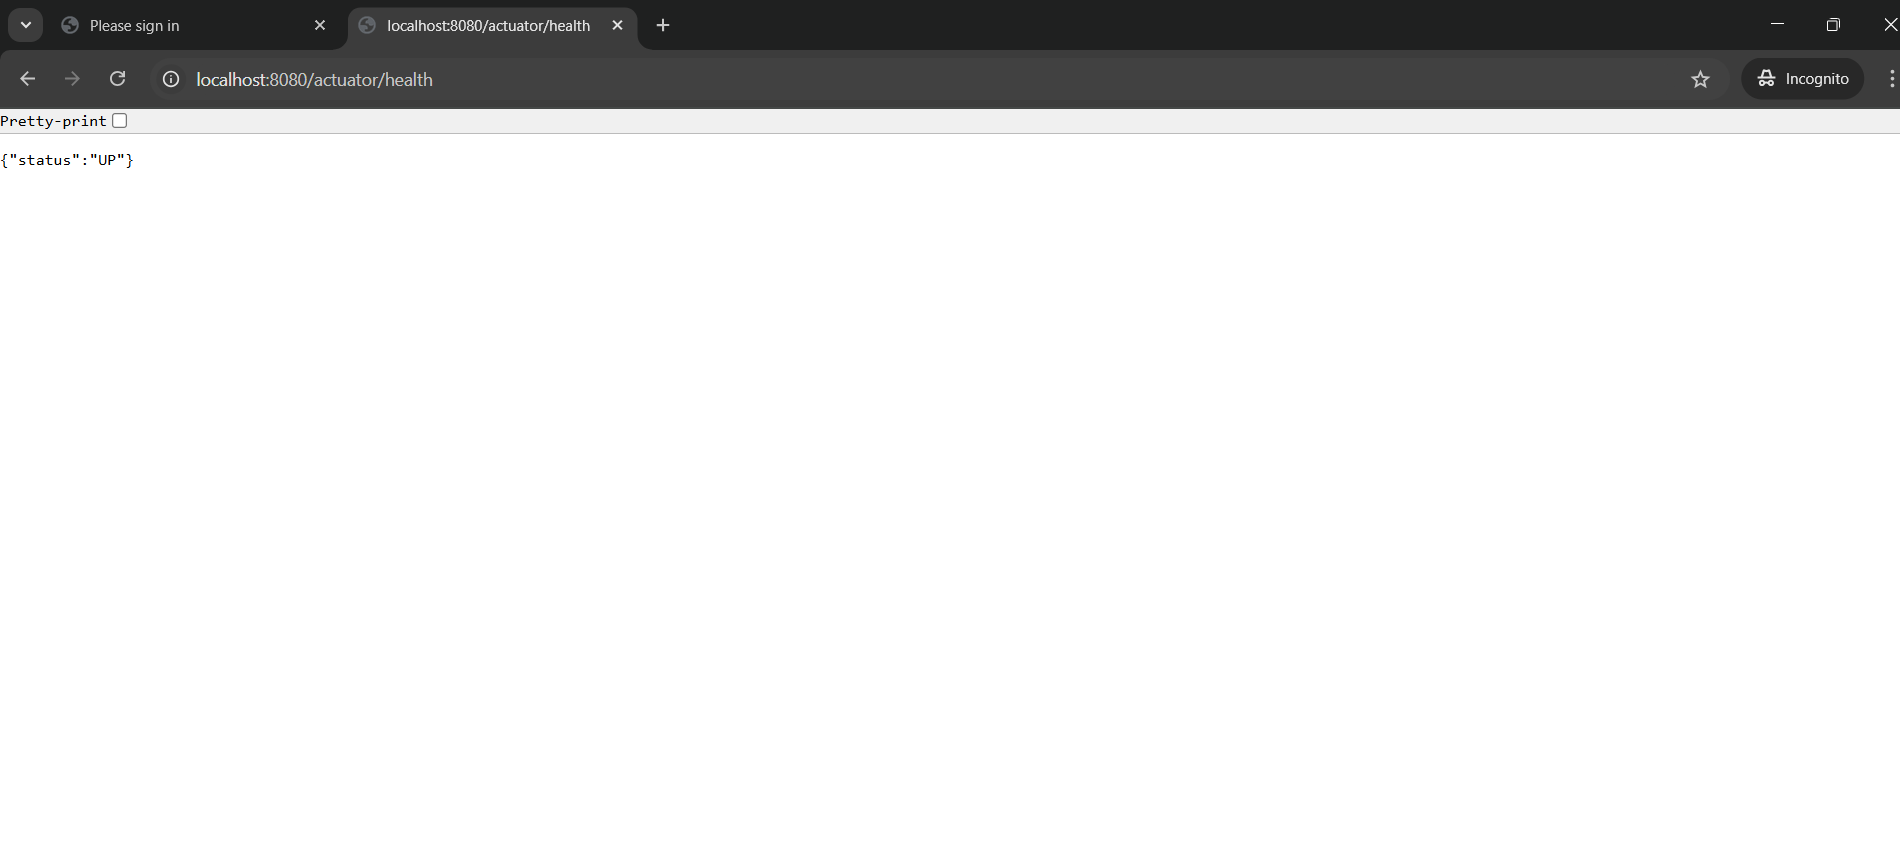

  

- 










